# Neurocognitive Test Scores
## Features
- MMSE = Mini-Mental State Exam (most common test used to diagnose AD). Max 30 points, scores of 22 points or fewer (adjusted by education) indicates memory concerns
- CDR = Clinical Dementia Rating (clinical evaluation of the level of dementia) [0 = absent; 0.5 = questionable; 1= present, but mild; 2 = moderate; 3 = severe; 4 = profound; 5 = terminal]
- CDRSB = CDR scale Sum of Boxes and score can be used to accurately stage severity of Alzheimer dementia and mild cognitive impairment (MCI)
- ADAS11 = has demonstrated the ability to discriminate between the diagnostic categories of NC, MCI, and AD at one point in time
- ADAS13 = identified cognitive domains hypothesized to be important treatment targets of antidementia drugs that are not assessed
## Summary
### ADNI
- 4459 rows, 6 features
- CDR column completely missing, dropped from dataset
- 104 rows with some NAN values
### Sheffield

In [6]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# ADNI DATA

In [7]:
"""
ADNI Dataset
"""
df = pd.read_csv('../datasets/adni_data/ADNI_Neuro.csv')
print(df.shape)
df

(4459, 6)


,ID,MMSE,CDR,CDRSB,ADAS11,ADAS13
0,1001bl,22.0,NaN,4.5,26.67,38.67
1,1001m12,12.0,NaN,6.0,38.33,48.33
2,1002bl,30.0,NaN,0.0,4.33,9.33
3,1002m12,29.0,NaN,0.0,4.33,9.33
4,1002m24,30.0,NaN,2.0,3.33,5.33
...,...,...,...,...,...,...
4454,997m18,23.0,NaN,4.5,20.00,34.00
4455,997m24,22.0,NaN,5.5,19.33,30.33
4456,997m36,23.0,NaN,4.5,25.33,37.33
4457,999bl,25.0,NaN,4.0,22.67,33.67


In [8]:
"""
Check for NAN values
"""
df.isnull().sum().sort_values(ascending=True)

ID           0
MMSE        10
ADAS11      28
CDRSB       32
ADAS13      71
CDR       4459
dtype: int64

In [9]:
"""
Drop CDR since it is all Nan
"""
df = df.drop(['CDR'], axis=1)
df

,ID,MMSE,CDRSB,ADAS11,ADAS13
0,1001bl,22.0,4.5,26.67,38.67
1,1001m12,12.0,6.0,38.33,48.33
2,1002bl,30.0,0.0,4.33,9.33
3,1002m12,29.0,0.0,4.33,9.33
4,1002m24,30.0,2.0,3.33,5.33
...,...,...,...,...,...
4454,997m18,23.0,4.5,20.00,34.00
4455,997m24,22.0,5.5,19.33,30.33
4456,997m36,23.0,4.5,25.33,37.33
4457,999bl,25.0,4.0,22.67,33.67


In [2]:
"""
Show rows with any Nan value:
MMSE        10
ADAS11      28
CDRSB       32
ADAS13      71

Total = 104 rows
"""
nan_rows = df[df.isnull().any(axis=1)]
# nan_rows
print("Feature  # NaN")
df[['MMSE', 'CDRSB', 'ADAS11', 'ADAS13']].isnull().sum()

NameError: name 'df' is not defined

<AxesSubplot:xlabel='MMSE', ylabel='CDRSB'>

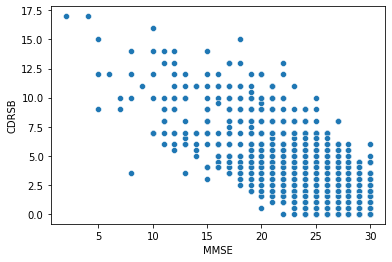

In [11]:
"""
Correlation between MMSE and CDRSB: strong negative correlation
"""
sns.scatterplot(x=df['MMSE'], y=df['CDRSB'])

In [12]:
"""
Strong correlation between MMSE and CDRSB justifies use of iterative imputer.
Imputing NaN values using linear regression.
SKlearn Multivariate imputer estimates each feature from all others given.
"""
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

itr = IterativeImputer(estimator=LinearRegression())
df[['MMSE', 'CDRSB']] = itr.fit_transform(df[['MMSE', 'CDRSB']])

# Check nan value count in MMSE, CDRSB
print(df[['MMSE', 'CDRSB']].isnull().sum())

# TODO: Want to be able to see what the new nan values are after imputation
print(df)

MMSE     0
CDRSB    0
dtype: int64
           ID  MMSE  CDRSB  ADAS11  ADAS13
0      1001bl  22.0    4.5   26.67   38.67
1     1001m12  12.0    6.0   38.33   48.33
2      1002bl  30.0    0.0    4.33    9.33
3     1002m12  29.0    0.0    4.33    9.33
4     1002m24  30.0    2.0    3.33    5.33
...       ...   ...    ...     ...     ...
4454   997m18  23.0    4.5   20.00   34.00
4455   997m24  22.0    5.5   19.33   30.33
4456   997m36  23.0    4.5   25.33   37.33
4457    999bl  25.0    4.0   22.67   33.67
4458   999m12  11.0    8.0   38.67   48.67

[4459 rows x 5 columns]


<AxesSubplot:xlabel='CDRSB', ylabel='ADAS11'>

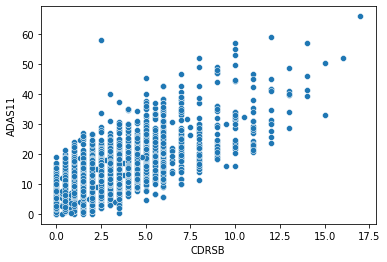

In [13]:
sns.scatterplot(x=df['CDRSB'], y=df['ADAS11'])

In [14]:
# Now we want to fill out ADAS11 and ADAS13 based on CDRSB
# itr = IterativeImputer(estimator=LinearRegression())
df[['CDRSB', 'ADAS11', 'ADAS13']] = itr.fit_transform(df[['CDRSB', 'ADAS11', 'ADAS13']])

# Check nan value count in MMSE, CDRSB
print(df[['ADAS11', 'ADAS13']].isnull().sum())

ADAS11    0
ADAS13    0
dtype: int64


/usr/local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [15]:
# Want to drop CDRSB as it is used for patients who have AD
df = df.drop(['CDRSB'], axis=1)
df

,ID,MMSE,ADAS11,ADAS13
0,1001bl,22.0,26.67,38.67
1,1001m12,12.0,38.33,48.33
2,1002bl,30.0,4.33,9.33
3,1002m12,29.0,4.33,9.33
4,1002m24,30.0,3.33,5.33
...,...,...,...,...
4454,997m18,23.0,20.00,34.00
4455,997m24,22.0,19.33,30.33
4456,997m36,23.0,25.33,37.33
4457,999bl,25.0,22.67,33.67


In [16]:
# Write to new preprocessed file
df.to_csv('../preprocessed_data/ADNI_NEURO.csv', encoding='utf-8', index=False)

# SHEFFIELD DATA

In [18]:
df = pd.read_csv('../datasets/sheffield_data/SHEF_Neuro.csv')
print(df.shape)
df

(4459, 6)


,ID,MMSE,CDR,CDRSB,ADAS11,ADAS13
0,SH_DARE_G1_001,21.0,1.0,NaN,NaN,NaN
1,SH_DARE_G1_002,23.0,1.0,NaN,NaN,NaN
2,SH_DARE_G1_003,21.0,1.0,NaN,NaN,NaN
3,SH_DARE_G1_004,16.0,2.0,NaN,NaN,NaN
4,SH_DARE_G1_005,19.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...
4454,NaN,NaN,NaN,NaN,NaN,NaN
4455,NaN,NaN,NaN,NaN,NaN,NaN
4456,NaN,NaN,NaN,NaN,NaN,NaN
4457,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
"""
Check for NAN values and remove rows with all NAN values
"""
df.isnull().sum().sort_values(ascending=True)

ID        4355
MMSE      4355
CDR       4357
CDRSB     4459
ADAS11    4459
ADAS13    4459
dtype: int64

In [20]:
null_rows = df.isnull().all(axis=1)
total_null = sum(null_rows)
print("Rows containing all NAN values: " + str(total_null))
print("Removing rows with all NAN values..")
df = df.dropna(how='all')
print("# Rows after cleanse: " + str(df.shape[0]))
df.isnull().sum().sort_values(ascending=True)

Rows containing all NAN values: 4355
Removing rows with all NAN values..
# Rows after cleanse: 104


ID          0
MMSE        0
CDR         2
CDRSB     104
ADAS11    104
ADAS13    104
dtype: int64

In [21]:
"""
Removing completely empty columns
"""
df = df.drop(['CDRSB', 'ADAS11', 'ADAS13'], axis=1)
df

,ID,MMSE,CDR
0,SH_DARE_G1_001,21.0,1.0
1,SH_DARE_G1_002,23.0,1.0
2,SH_DARE_G1_003,21.0,1.0
3,SH_DARE_G1_004,16.0,2.0
4,SH_DARE_G1_005,19.0,1.0
...,...,...,...
99,SH_DARE_G3_024,30.0,0.5
100,SH_DARE_G3_025,25.0,0.5
101,SH_DARE_G3_026,25.0,0.5
102,SH_DARE_G3_027,25.0,0.5


In [22]:
"""
Viewing any rows with some NaN values
"""
missing_cdr = df[df.isnull().any(axis=1)]
missing_cdr

,ID,MMSE,CDR
43,SH_DARE_G2_011,25.0,NaN
79,SH_DARE_G3_004,25.0,NaN


In [23]:
"""
CDR has stages 0.5, 1, 2 and 3

Want to impute these values based on MMSE and CDR scores
Seems like there is strong negative correlation between features (-0.90)
"""
print(df.corr())


          MMSE       CDR
MMSE  1.000000 -0.897949
CDR  -0.897949  1.000000


In [ ]:
# Remove CDR